In [389]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import warnings
warnings.filterwarnings('ignore')
style.use('default')

###### Throughout the project, we focused on explanatory data visualization and learned the following:

1. How to use information design principles (familiarity and maximizing the data-ink ratio) to create better graphs for an audience.
2. About the elements of a story and how to create storytelling data visualizations using Matplotlib.
3. How to create visual patterns using Gestalt principles.
4. How to guide the audience's attention with pre-attentive attributes.
5. How to use Matplotlib built-in styles — with a case study on the FiveThirtyEight style.

In [390]:
exchange_rates = pd.read_csv('./euro-daily-hist_1999_2020.csv')
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [391]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
Period\Unit:                5699 non-null object
[Australian dollar ]        5699 non-null object
[Bulgarian lev ]            5297 non-null object
[Brazilian real ]           5431 non-null object
[Canadian dollar ]          5699 non-null object
[Swiss franc ]              5699 non-null object
[Chinese yuan renminbi ]    5431 non-null object
[Cypriot pound ]            2346 non-null object
[Czech koruna ]             5699 non-null object
[Danish krone ]             5699 non-null object
[Estonian kroon ]           3130 non-null object
[UK pound sterling ]        5699 non-null object
[Greek drachma ]            520 non-null object
[Hong Kong dollar ]         5699 non-null object
[Croatian kuna ]            5431 non-null object
[Hungarian forint ]         5699 non-null object
[Indonesian rupiah ]        5699 non-null object
[Israeli shekel ]           5431 non-null object
[Indian rupe

In [392]:
exchange_rates.isnull().sum()

Period\Unit:                   0
[Australian dollar ]           0
[Bulgarian lev ]             402
[Brazilian real ]            268
[Canadian dollar ]             0
[Swiss franc ]                 0
[Chinese yuan renminbi ]     268
[Cypriot pound ]            3353
[Czech koruna ]                0
[Danish krone ]                0
[Estonian kroon ]           2569
[UK pound sterling ]           0
[Greek drachma ]            5179
[Hong Kong dollar ]            0
[Croatian kuna ]             268
[Hungarian forint ]            0
[Indonesian rupiah ]           0
[Israeli shekel ]            268
[Indian rupee ]              268
[Iceland krona ]            2407
[Japanese yen ]                0
[Korean won ]                  0
[Lithuanian litas ]         1540
[Latvian lats ]             1795
[Maltese lira ]             3353
[Mexican peso ]                0
[Malaysian ringgit ]           0
[Norwegian krone ]             0
[New Zealand dollar ]          0
[Philippine peso ]             0
[Polish zl

In [393]:
exchange_rates.shape

(5699, 41)

In [394]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time','[Indian rupee ]':'Indian rupee'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [395]:
#Set the currency we need to compare against the USD

In [397]:
currency='Indian rupee'
exchange_rates=exchange_rates.dropna(subset=[currency,'US_dollar'])

In [398]:
exchange_rates.head()

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
268,2000-01-13,1.5450,NaN,1.8718,1.4897,1.6111,8.5054,0.57760,36.149,7.4450,...,1.8860,29.4837,8.6475,1.7139,199.9443,42.273,38.4907,0.5555,1.0276,6.2303
269,2000-01-14,1.5332,NaN,1.8425,1.4819,1.6130,8.4632,0.57743,36.058,7.4449,...,1.8776,29.2350,8.6230,1.7130,199.9972,42.302,38.2727,0.5536,1.0225,6.2096
270,2000-01-17,1.5212,NaN,1.8129,1.4651,1.6136,8.3548,0.57697,35.984,7.4428,...,1.8502,28.9738,8.5640,1.6918,199.9930,42.331,37.8146,0.5523,1.0094,6.1296
271,2000-01-18,1.5222,NaN,1.8066,1.4626,1.6131,8.3540,0.57683,35.978,7.4439,...,1.8507,28.8510,8.5705,1.6875,199.9935,42.347,37.6591,0.5521,1.0093,6.1355
272,2000-01-19,1.5222,NaN,1.8179,1.4647,1.6120,8.3639,0.57690,36.112,7.4440,...,1.8512,28.8815,8.5835,1.6946,199.9226,42.334,37.8330,0.5523,1.0105,6.1691


In [399]:
inr_to_dollar=exchange_rates[['Time',currency,'US_dollar']]

In [400]:
inr_to_dollar[0:5]

,Time,Indian rupee,US_dollar
268,2000-01-13,44.7240,1.0276
269,2000-01-14,44.4730,1.0225
270,2000-01-17,43.9790,1.0094
271,2000-01-18,43.9980,1.0093
272,2000-01-19,44.0060,1.0105


### Data Cleaning

1. Remove the rows with '-' from the US_dollar column

In [401]:
inr_to_dollar[currency].value_counts()  #62 rows with '-'
inr_to_dollar = inr_to_dollar[exchange_rates[currency] !='-']
inr_to_dollar = inr_to_dollar[exchange_rates['US_dollar'] !='-']
inr_to_dollar[currency]=inr_to_dollar[currency].astype(float)
inr_to_dollar[currency]=(inr_to_dollar[currency].astype(float))/(inr_to_dollar['US_dollar'].astype(float))

In [402]:
inr_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5370 entries, 268 to 5698
Data columns (total 3 columns):
Time            5370 non-null datetime64[ns]
Indian rupee    5370 non-null float64
US_dollar       5370 non-null object
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 167.8+ KB


In [403]:
rolling_mean[0:5]

0    43.522772
1    43.494377
2    43.569447
3    43.592589
4    43.548738
Name: Indian rupee, dtype: float64

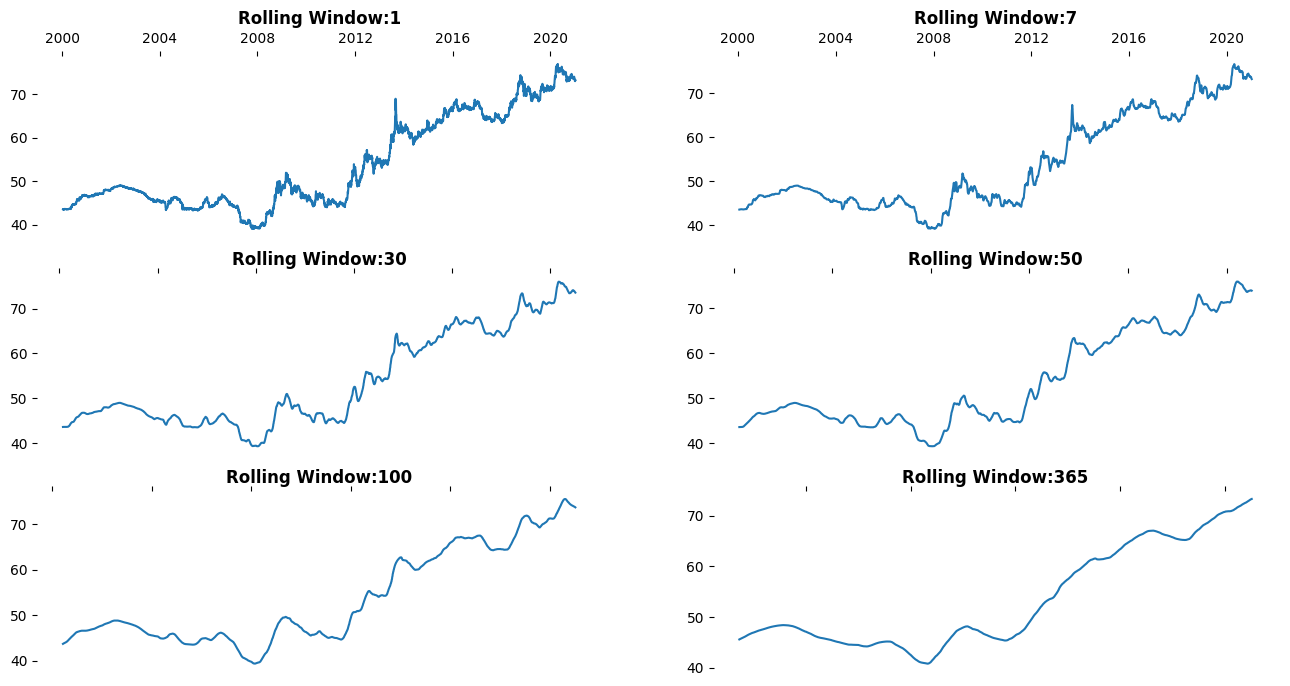

In [404]:
fig = plt.figure(figsize=(16,8))
rolling=[1,7, 30, 50, 100, 365]
count=[1,2,3,4,5,6]
axes = ['ax1','ax2','ax3', 'ax4', 'ax5', 'ax6']
for x,cli,ax in zip(count,rolling,axes):
    ax=fig.add_subplot(3,2,x)
    ax.plot(inr_to_dollar['Time'],inr_to_dollar[currency].rolling(cli).mean())
    ax.xaxis.tick_top()
    plt.title('Rolling Window:' + str(cli), weight='bold')
    for location in ['left', 'right', 'bottom', 'top']:
       ax.spines[location].set_visible(False)
    if x in [3,4,5,6]:
      ax.set_xticklabels([])
    else:
        continue
    

#### Finding the peak value for every year

In [408]:
inr_to_dollar['year']=inr_to_dollar['Time'].dt.year
grp_max= inr_to_dollar[['year', 'rolling_mean']].groupby('year').max().reset_index()
years=['2000','2004','2007','2008','2012','2014','2016','2020']
grp_max=grp_max[grp_max['year'].isin(years)].reset_index(drop=True)
grp_max['rolling_mean']=grp_max['rolling_mean'].apply(lambda x: int(x))
grp_max

,year,rolling_mean
0,2000,46
1,2004,46
2,2007,44
3,2008,49
4,2012,55
5,2014,62
6,2016,68
7,2020,76


In [409]:
inr_to_dollar['rolling_mean']=inr_to_dollar[currency].rolling(30).mean()

i2u1= inr_to_dollar.copy()[(inr_to_dollar['Time'].dt.year >=1975) &
                    (inr_to_dollar['Time'].dt.year <=2010)]

i2u2= inr_to_dollar.copy()[(inr_to_dollar['Time'].dt.year >2007) &
                    (inr_to_dollar['Time'].dt.year <=2020)]


Text(737276, 76, '73')

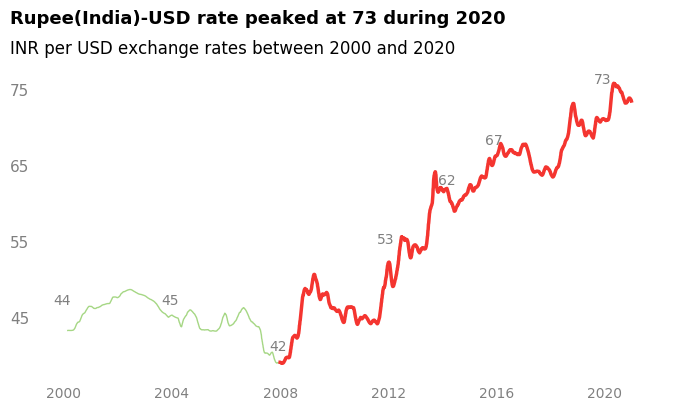

In [410]:
#style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(8, 4))
#height parameter controls the bar width
#left parameter moves the graph to the right if +ive , to the left if -ive


ax.plot(i2u1['Time'], i2u1['rolling_mean'],
         color='#A6D785', linewidth=1)

#print(ax.get_ylim()) #range limits of x-axis
#print(ax.get_xlim()) #range limits of y-axis


ax.plot(i2u2['Time'], i2u2['rolling_mean'],
         color='#f43530', linewidth=2.5)

#print(ax.get_ylim()) #range limits of x-axis
#print(ax.get_xlim()) #range limits of y-axis

##removeing unneeded elements to increase the data-ink ratio
#ax.set_xticklabels([]) ##remove the x labels
ax.set_yticklabels([]) ##remove the y labels
ax.grid([])  ## remove the gridlines
ax.tick_params(bottom=False, left=False,top=False)
for location in ['left', 'right', 'bottom', 'top']:
       ax.spines[location].set_visible(False)  #used to remove the splines 
ax.tick_params(axis="x", colors="gray")


### Adding a title and a subtitle    
ax.text(ax.get_xlim()[0]-400, ax.get_ylim()[1]+6, "Rupee(India)-USD rate peaked at 73 during 2020",
        weight='bold', size=13)
ax.text(ax.get_xlim()[0]-400, ax.get_ylim()[1]+2, 'INR per USD exchange rates between 2000 and 2020',
        size=12)

## Adding labels to y-axis
y = 44.5  
for rate in ['45', '55', '65', '75']:
    ax.text(ax.get_xlim()[0]-400, y, rate, alpha=0.5, fontsize=11)
    y=y+10

## Adding peak value for Important years
value = grp_max['rolling_mean'].values
ax.text(729976, 47, '44', alpha=0.5)
ax.text(729976+365*4, 47, '45', alpha=0.5)
ax.text(729976+365*8, 41, '42', alpha=0.5)
ax.text(729976+365*12, 55, '53', alpha=0.5)
ax.text(729976+365*14.25, 62.75, '62', alpha=0.5)
ax.text(729976+365*16, 68, '67', alpha=0.5)
ax.text(729976+365*20, 76, '73', alpha=0.5)


#### creating dataframes for each of the PM's

In [411]:
inr_to_dollar

atal = inr_to_dollar[inr_to_dollar['year']<=2004]
manmohan = inr_to_dollar[(inr_to_dollar['year']>2004) & (inr_to_dollar['year']<=2014)]
modi = inr_to_dollar[(inr_to_dollar['year']>2014)]

#### Change in INR/dollar during Modi

In [412]:
(modi.loc[modi['Time'].idxmax(),:]['Indian rupee']-modi.loc[modi['Time'].idxmin(),:]['Indian rupee'])/modi.loc[modi['Time'].idxmin(),:]['Indian rupee']

0.15701317837751066

#### Change in INR/dollar during Atal

In [413]:
(atal.loc[atal['Time'].idxmax(),:]['Indian rupee']-atal.loc[atal['Time'].idxmin(),:]['Indian rupee'])/atal.loc[atal['Time'].idxmin(),:]['Indian rupee']

-0.0003941655850423285

#### Change in INR/dollar during Manmohan

In [414]:
(manmohan.loc[manmohan['Time'].idxmax(),:]['Indian rupee']-manmohan.loc[manmohan['Time'].idxmin(),:]['Indian rupee'])/manmohan.loc[manmohan['Time'].idxmin(),:]['Indian rupee']

0.4541897051222093

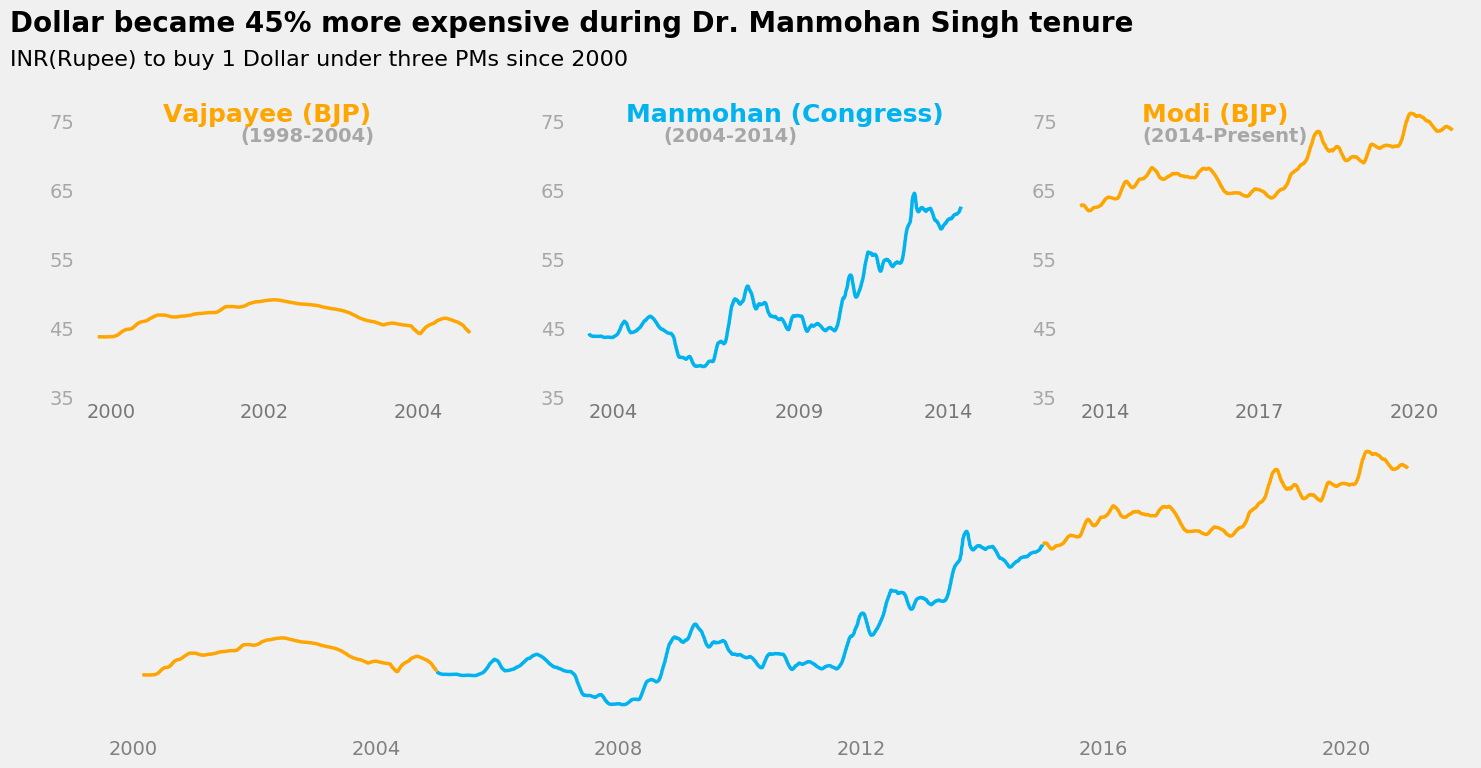

In [415]:
style.use('fivethirtyeight')
fig = plt.figure(figsize=(16, 8))

ax1 = plt.subplot2grid((4, 3), (0, 0),rowspan=2)
ax2 = plt.subplot2grid((4, 3), (0, 1), rowspan=2)
ax3 = plt.subplot2grid((4, 3), (0, 2),rowspan=2)
ax4 = plt.subplot2grid((4, 1), (2, 0),rowspan=2)

axes = [ax1, ax2, ax3, ax4]

### Changes to all the subplots
for ax in axes:
    ax.set_ylim(40, 80)
    ax.set_yticks([35, 45, 55, 65, 75])
    ax.set_yticklabels(['35','45', '55','65', '75'],
                   alpha=0.3) 
    ax.grid([])
    ax.tick_params(bottom=False, left=False,top=False)
    for location in ['left', 'right', 'bottom', 'top']:
       ax.spines[location].set_visible(False)  #used to remove the splines 


####Plot for PM Atal from 1998-2004
ax1.plot(atal['Time'], atal['rolling_mean'],
         color='#ffa500', linewidth=2.5)
ax1.text(730486, 75, 'Vajpayee (BJP)', fontsize=18, weight='bold',
        color='#ffa500')
ax1.text(730851, 72, '(1998-2004)', weight='bold',
        alpha=0.3)
ax1.set_xticklabels([])


ax1.text(729755+365, 32, '2000', alpha=0.5) #### labels x-axis
ax1.text(730486+365, 32, '2002', alpha=0.5)
ax1.text(731216+365, 32, '2004', alpha=0.5)

#print('ax1',ax1.get_xticks())
#print('ax1',ax1.get_yticks())


##Plot for PM Manmohan from 2004-2014
ax2.plot(manmohan['Time'], manmohan['rolling_mean'],
         linewidth=2.5, color='#00B2EE')
ax2.text(732312, 75, 'Manmohan (Congress)', fontsize=18, weight='bold',
        color='#00B2EE')
ax2.text(732677, 72, '(2004-2014)', weight='bold',
        alpha=0.3)
ax2.set_xticklabels([])

ax2.text(731581+1*365, 32, '2004', alpha=0.5)
ax2.text(731581+6*365, 32, '2009', alpha=0.5)
ax2.text(731581+10*365, 32, '2014', alpha=0.5)

#print('ax2',ax2.get_xticks())
#print('ax2',ax2.get_yticks())



##Plot for PM Modi from 2014-2020
ax3.plot(modi['Time'], modi['rolling_mean'],
         color='#ffa500', linewidth=2.5)
ax3.text(735964, 75, 'Modi (BJP)', fontsize=18, weight='bold',
        color='#ffa500')
ax3.text(735964, 72, '(2014-Present)', weight='bold',
        alpha=0.3)

ax3.text(735234+1*365, 32, '2014', alpha=0.5)
ax3.text(735234+3.5*365, 32, '2017', alpha=0.5)
ax3.text(735234+6*365, 32, '2020', alpha=0.5)
ax3.set_xticklabels([])
#print('ax3',ax3.get_xticks())
#print('ax3',ax3.get_yticks())


###Entire plot from 2000-2020

ax4.plot(inr_to_dollar['Time'],inr_to_dollar['rolling_mean'],
         color='#A6D785', linewidth=1)
ax4.plot(modi['Time'], modi['rolling_mean'],
         color='#ffa500', linewidth=2.5)
ax4.plot(manmohan['Time'], manmohan['rolling_mean'],
         linewidth=2.5, color='#00B2EE')
ax4.plot(atal['Time'], atal['rolling_mean'],
         color='#ffa500', linewidth=2.5)
ax4.set_yticklabels([]) ##remove the y labels
ax4.tick_params(axis="x", colors="gray") ###change the color of the x-axis labels
ax4.grid([])  ## remove the gridlines

#print('ax4',ax4.get_xticks())
#print('ax4',ax4.get_yticks())



#title of the entire plot
ax1.text(729755, 88, 'Dollar became 45% more expensive during Dr. Manmohan Singh tenure',
         fontsize=20, weight='bold')
ax1.text(729755, 83, '''INR(Rupee) to buy 1 Dollar under three PMs since 2000''',
        fontsize=16)

plt.show()